In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
df = pd.read_csv("Hashtag_sum_2_10_2013.csv")
df

,Unnamed: 0,date,#covid19,#crypto,#bitcoin,#ukraine,#travel,#mondaymotivation,#christmas,#iran,#realestate
0,647,01/01/2013,0,0,0,0,3,0,0,1,0
1,648,02/01/2013,0,0,0,0,0,0,0,1,0
2,649,03/01/2013,0,0,0,0,2,0,0,1,1
3,650,04/01/2013,0,0,1,0,1,0,2,0,0
4,651,05/01/2013,0,0,0,0,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
3734,4381,16/04/2023,36,47,57,56,71,1,3,23,14
3735,4382,17/04/2023,48,51,49,72,54,49,1,28,16
3736,4383,18/04/2023,33,42,31,30,87,0,1,11,15
3737,4384,19/04/2023,18,15,23,14,4,0,0,6,1


In [ ]:

df = pd.read_csv('/content/Hashtag_sum_2_10_2013.csv')

# Convert 'week_start_date' to datetime
# Use dayfirst=True to correctly parse the date format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Set 'date' as index
df.set_index('date', inplace=True)

# Define the target hashtags
hashtags = ['#covid19', '#travel', '#mondaymotivation', '#christmas', '#ukraine']

# Prepare data for training
def create_lagged_features(data, n_in=7, n_out=1):
    X, y = [], []
    for i in range(len(data) - n_in - n_out + 1):
        X.append(data[i:(i + n_in)])
        y.append(data[(i + n_in):(i + n_in + n_out)])
    return np.array(X), np.array(y)

# Dictionary to store models and predictions
models = {}
predictions = {}

for hashtag in hashtags:
    if hashtag in df.columns:
        # Get the data for the current hashtag
        hashtag_data = df[hashtag].values

        # Create lagged features and target
        X, y = create_lagged_features(hashtag_data, n_in=7, n_out=1)

        # Reshape X for the model (samples, features)
        X = X.reshape(X.shape[0], X.shape[1])

        # Reshape y for the model (samples, targets)
        y = y.reshape(y.shape[0], y.shape[1])

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X, y)

        # Store the trained model
        models[hashtag] = model


        predicted = model.predict(X)
        predictions[hashtag] = predicted.flatten() # Flatten for easier handling

        print(f"Trained model for {hashtag}")

    else:
        print(f"Hashtag {hashtag} not found in the dataset.")


Trained model for #covid19
Trained model for #travel
Trained model for #mondaymotivation
Trained model for #christmas
Trained model for #ukraine


In [ ]:


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Limit the number of rows to visualize
num_rows_to_viz = 500

n_in = 7
dates_for_predictions = df.index[n_in : n_in + len(X)][:num_rows_to_viz]


for hashtag in hashtags:
    if hashtag in df.columns and hashtag in predictions:
        plt.figure(figsize=(15, 6))

        plt.plot(dates_for_predictions, df[hashtag].values[n_in : n_in + len(predictions[hashtag])][:num_rows_to_viz], label=f'Original {hashtag}', alpha=0.7)

        # Plot predicted data
        plt.plot(dates_for_predictions, predictions[hashtag][:num_rows_to_viz], label=f'Predicted {hashtag}', alpha=0.7)

        plt.title(f'Original vs Predicted Data for {hashtag} (First {num_rows_to_viz} Rows)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gcf().autofmt_xdate() # Auto-rotate date labels

        plt.show()
    elif hashtag in df.columns:
         print(f"No predictions available for {hashtag}.")



NameError: name 'hashtags' is not defined

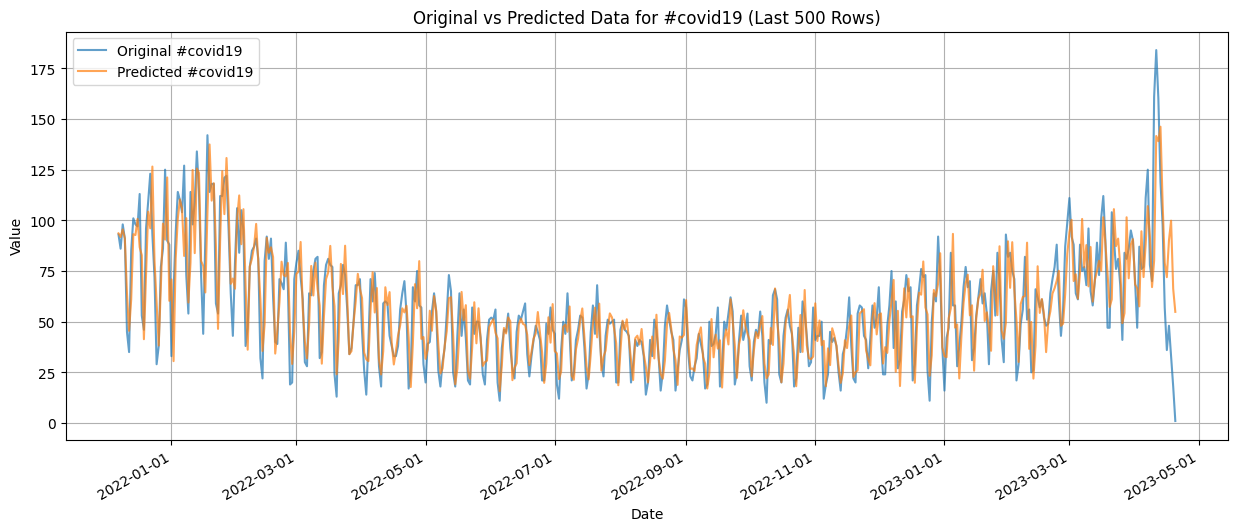

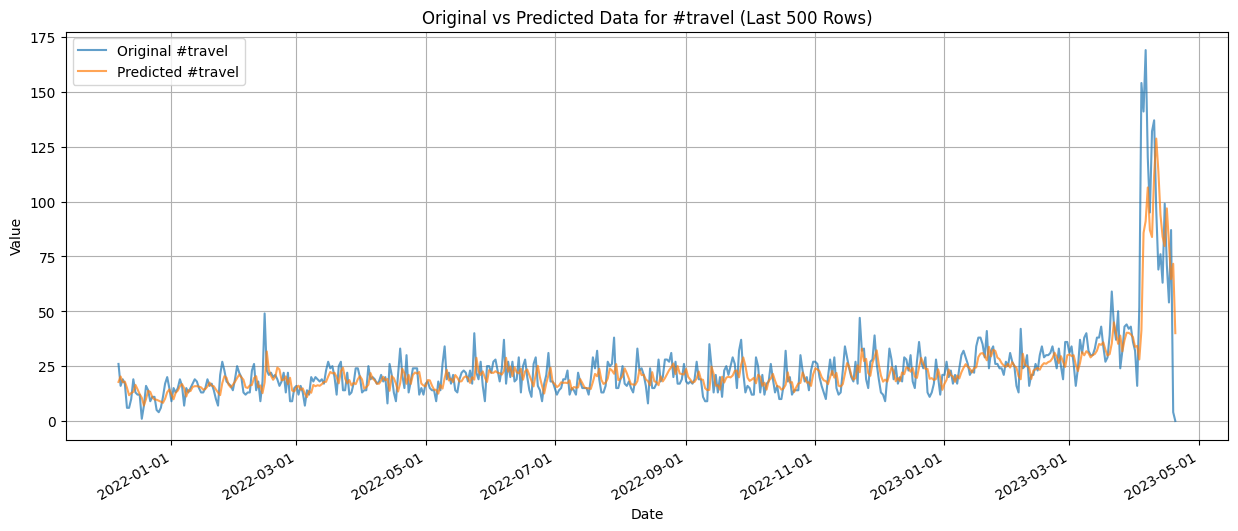

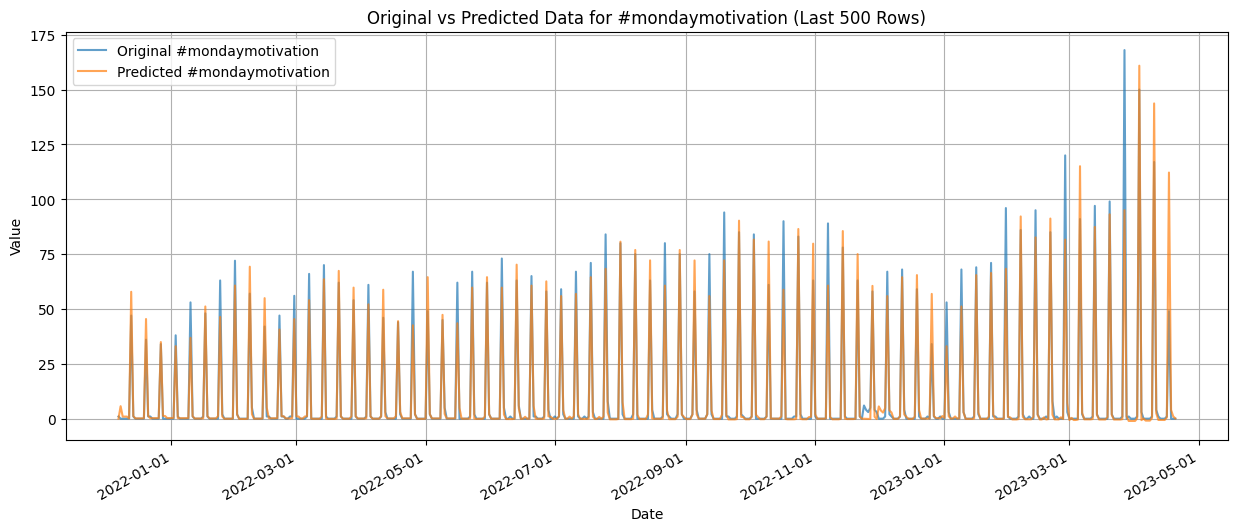

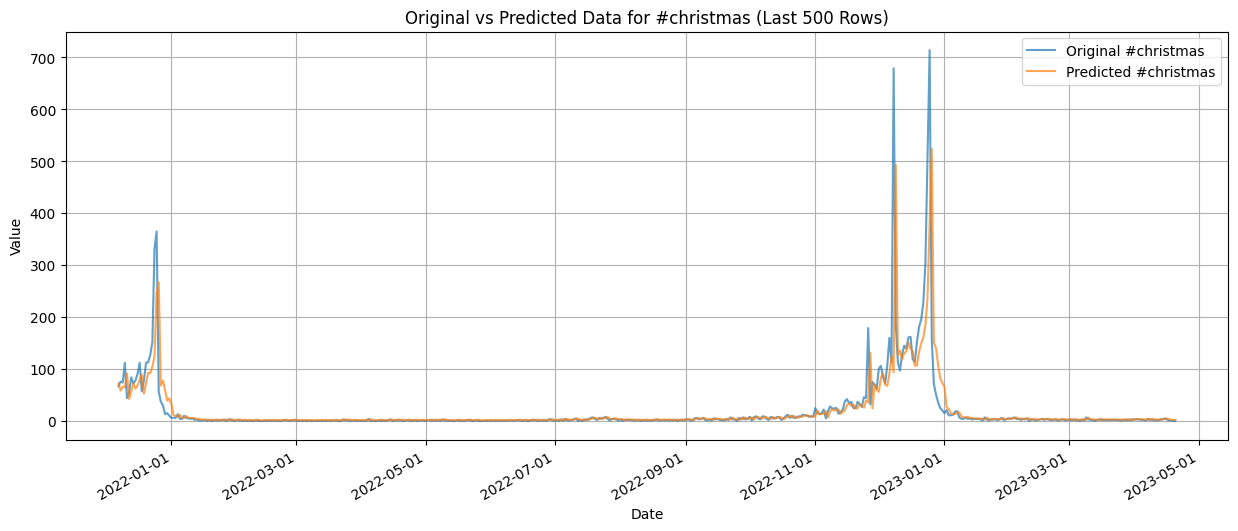

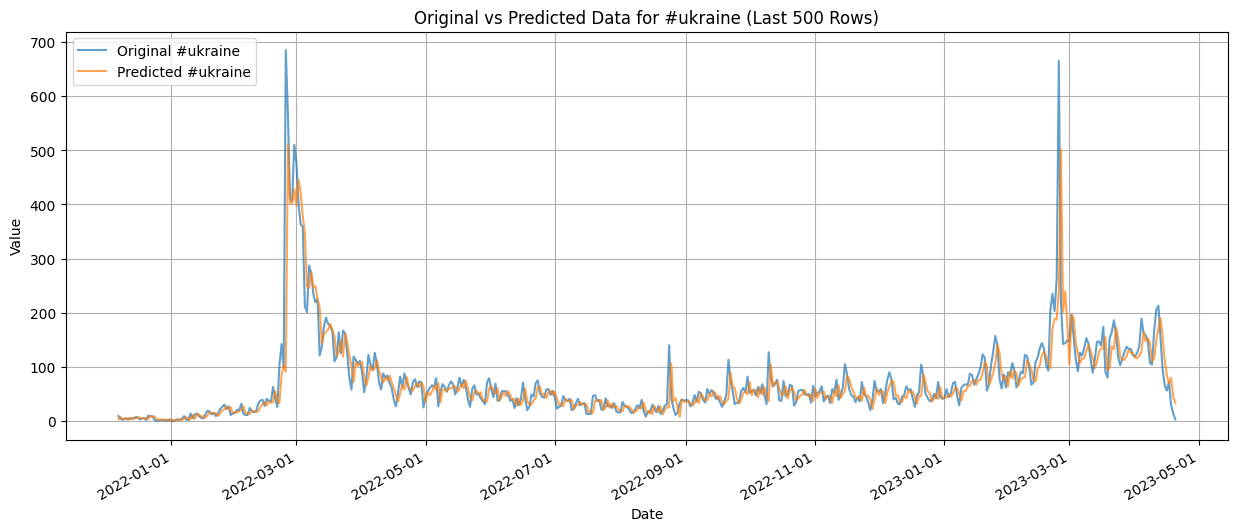

In [ ]:


import matplotlib.pyplot as plt
# Limit the number of rows to visualize
num_rows_to_viz = 500

n_in = 7
dates_for_predictions = df.index[n_in : n_in + len(X)][-num_rows_to_viz:]


for hashtag in hashtags:
    if hashtag in df.columns and hashtag in predictions:
        plt.figure(figsize=(15, 6))

        plt.plot(dates_for_predictions, df[hashtag].values[n_in : n_in + len(predictions[hashtag])][-num_rows_to_viz:], label=f'Original {hashtag}', alpha=0.7)

        # Plot predicted data
        plt.plot(dates_for_predictions, predictions[hashtag][-num_rows_to_viz:], label=f'Predicted {hashtag}', alpha=0.7)

        plt.title(f'Original vs Predicted Data for {hashtag} (Last {num_rows_to_viz} Rows)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # Format the x-axis dates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gcf().autofmt_xdate() # Auto-rotate date labels

        plt.show()
    elif hashtag in df.columns:
         print(f"No predictions available for {hashtag}.")


In [ ]:
# tạo các chỉ số đánh giá cho từng mô hình

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store evaluation metrics
evaluation_metrics = {}

for hashtag in hashtags:

        n_in = 7
        original_values = df[hashtag].values[n_in : n_in + len(predictions[hashtag])]
        predicted_values = predictions[hashtag]

        # Calculate evaluation metrics
        mse = mean_squared_error(original_values, predicted_values)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(original_values, predicted_values)
        r2 = r2_score(original_values, predicted_values)

        # Store the metrics
        evaluation_metrics[hashtag] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }

        print(f"Evaluation metrics for {hashtag}:")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R2: {r2:.4f}")
    elif hashtag in df.columns:
        print(f"Could not calculate metrics for {hashtag} as predictions are not available.")


Evaluation metrics for #covid19:
  MSE: 402.5156
  RMSE: 20.0628
  MAE: 6.9579
  R2: 0.9461
Evaluation metrics for #travel:
  MSE: 45.4702
  RMSE: 6.7432
  MAE: 4.3309
  R2: 0.6308
Evaluation metrics for #mondaymotivation:
  MSE: 22.4449
  RMSE: 4.7376
  MAE: 1.6839
  R2: 0.9195
Evaluation metrics for #christmas:
  MSE: 387.8673
  RMSE: 19.6943
  MAE: 4.6034
  R2: 0.6320
Evaluation metrics for #ukraine:
  MSE: 242.1603
  RMSE: 15.5615
  MAE: 3.3458
  R2: 0.8324
